# **5.1 Datenvorbereitung**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly.io as io
io.renderers.default='browser'
from scipy import stats
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick verschaffen (simple Metadaten)

* head() --> liefert Ansicht der ersten 5 Zeilen
* tail() --> liefert Ansicht der letzten 5 Zeilen
* info() --> liefert Informationen zu Spalten und Zeilen
* columns --> gibt Spaltennamen zurück
* shape --> liefert Dimensionen des Datensatzes
* types --> zeigt Formate der Spaltenwerte an

In [32]:
df = pd.read_csv('students_P1.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74.0
1,female,group C,some college,standard,completed,69.0,90,88.0
2,female,group B,master's degree,standard,none,90.0,95,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44.0
4,male,group C,some college,standard,none,76.0,78,75.0


# *Datensatz StudentsPerformance.csv - Metadaten*
---------------------------------------------------

Dieser fiktive Datensatz enthält Informationen zu den erreichten Noten von Schülern in diversen Fächern (Mathe, Lesen, Schreiben). Ziel dieses Übungsdatensatzes besteht in der Untersuchung von Zusammenhängen zwischen den Noten der Schüler, deren Background und Test-Vorbereitung.

Quelle: http://roycekimmons.com/tools/generated_data/exams

# **Attribute:**

*   **Gender**: Male/ Female
*   **Race/Ethnicity**:  Gruppierung von A bis E
*   **Parental Level of Education**: Details zum Qualifizierungsgrad der Eltern von Schulabschluss (high school) bis Universitätsabschluss (master's degree)
*   **Lunch**: Ausgewählte Option für Mittagessen
*   **Test Preparation Course**: Info zu Vorbereitungskurs
*   **Math Score**: Erreichte Prozent-Punkte in Mathematik
*   **Reading Score**: Erreichte Prozent-Punkte in Lesen
*   **Writing Score**: Erreichte Prozent-Punkte im Schreiben

In [33]:
df.shape

(1001, 8)

In [34]:
print(f"Der Datensatz enthält {df.shape[0]} Reihen und {df.shape[1]} Spalten.")

Der Datensatz enthält 1001 Reihen und 8 Spalten.


Datentypen:
Der Datensatz entält 5 Kategorien-Spalten und 3 numerische Spalten.

In [35]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                    int64
writing score                  float64
dtype: object

## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [36]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 1
reading score - 0
writing score - 2


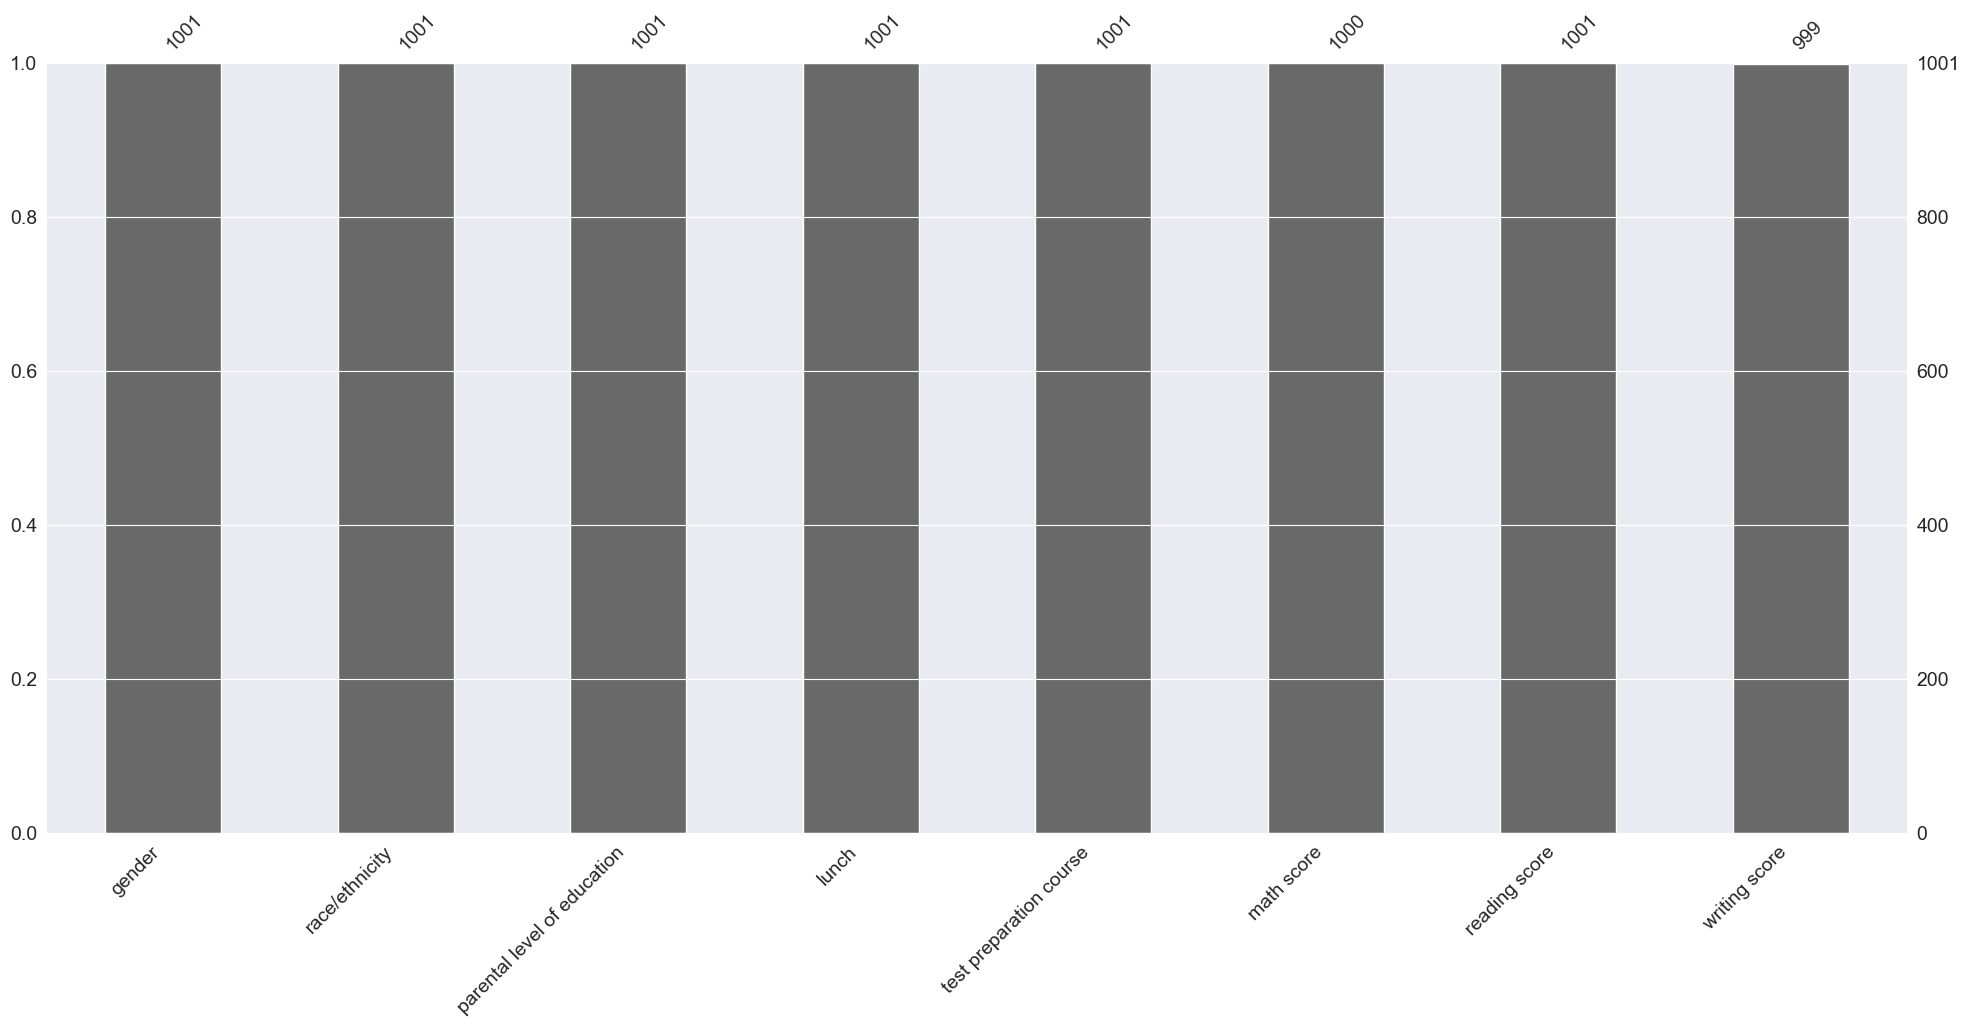

In [37]:
missingno.bar(df, fontsize = 14)
plt.show()

## d) Duplikate

redundante Datenpunkte finden und entfernen

In [38]:
df.duplicated().sum()

1

## e) Bereinigen des Datensatzes

* Einträge mit fehlenden Daten entfernen - Achtung! Bei großen Verlusten gezieltes Anpassen der Filter! --> dropna
* Redundante Datensätze löschen --> drop_duplicates

In [39]:
# Welche Spalten sind betroffen? Alternative Lösung
incomplete_columns = list(df.columns[df.isnull().any()])
incomplete_columns

['math score', 'writing score']

In [40]:
# Wieviel Daten fehlen - Angabe in Prozent? Alternative Lösung
for col in incomplete_columns:
    percent_missing = df[df[col].isnull() == True].shape[0] / df.shape[0]*100
    print("percent missing for column {}: {}".format(col, percent_missing))

percent missing for column math score: 0.0999000999000999
percent missing for column writing score: 0.1998001998001998


**Löschen mit der Function dropna (pandas):** entwickelt für statistische Analysen, die Probleme erzeugen, wenn nicht numerische Einträge in den Zellen stehen (NaN).
Sehr hilfreiches Tool - bietet viele Optionen zur gezielten Entfernung von fehlenden Dateneinträgen

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html


In [41]:
# Entfernen der Zeilen mit fehlenden Daten - pandas dropna function
df2 = df.dropna()
df2.shape

(998, 8)

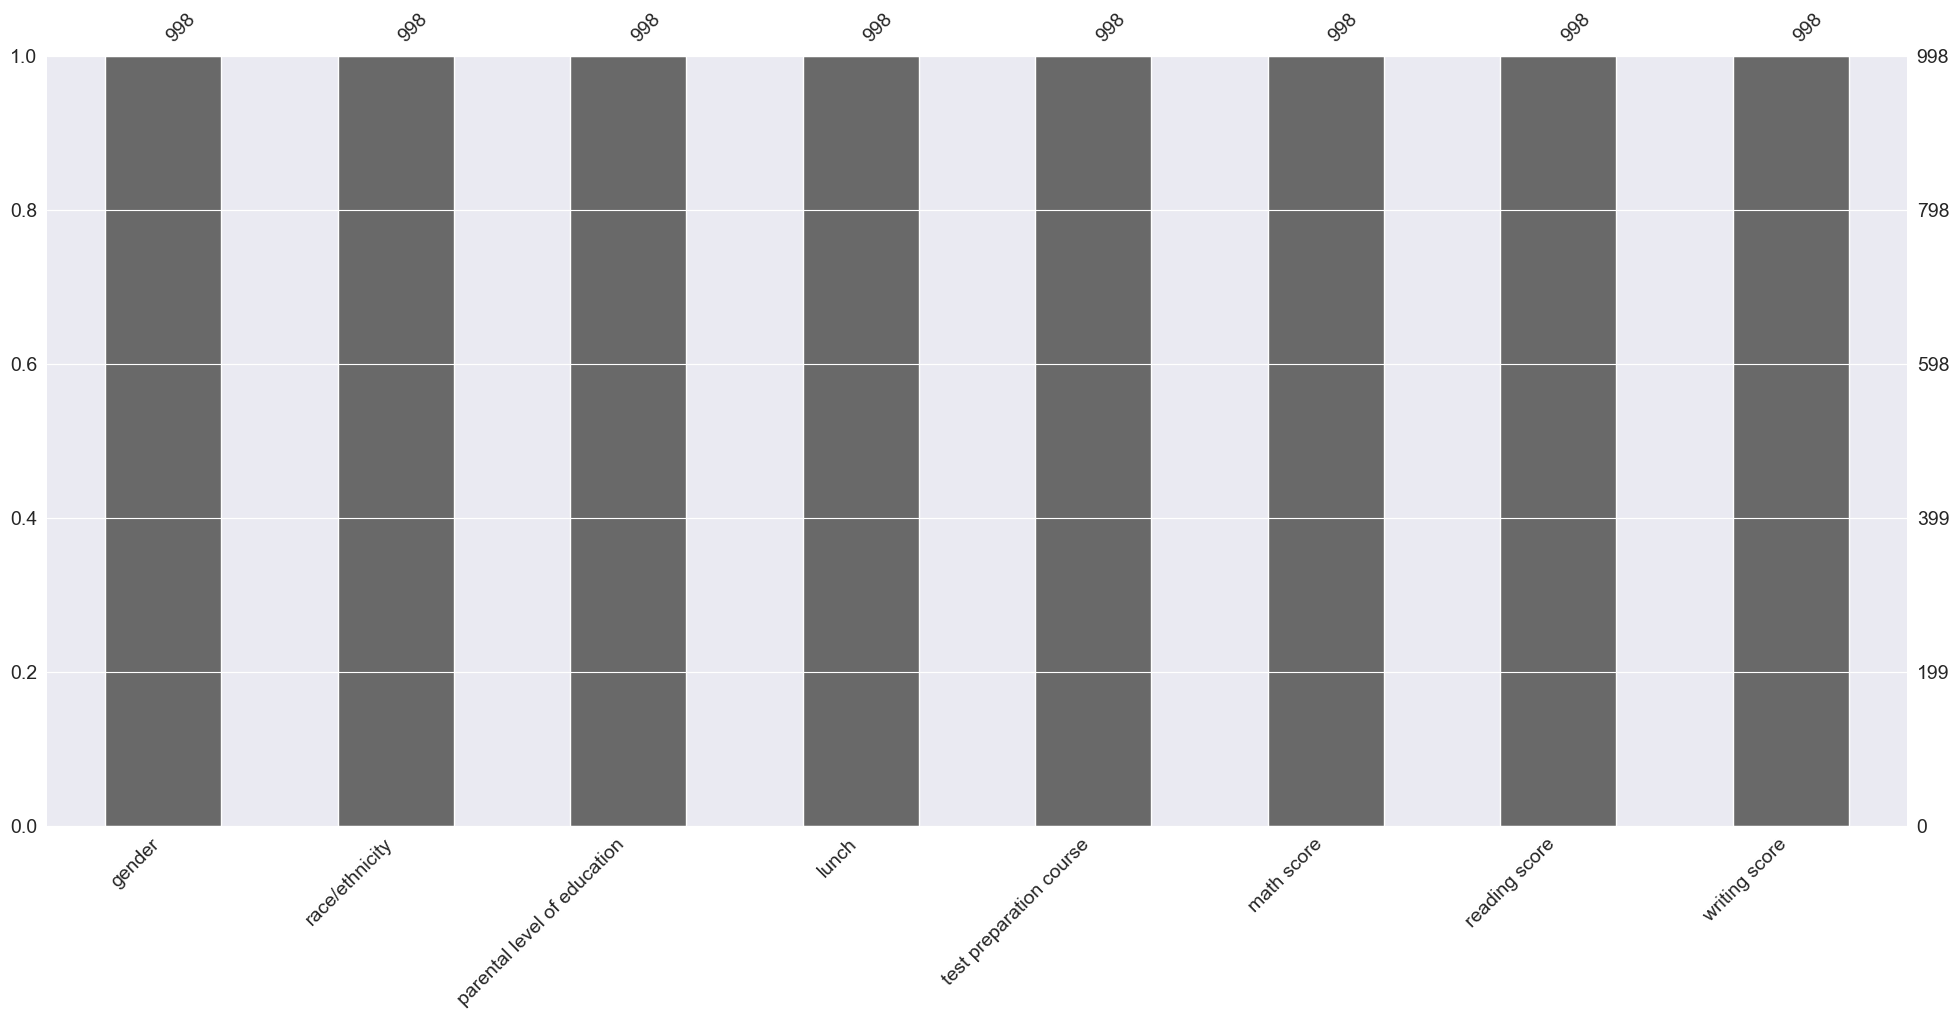

In [42]:
missingno.bar(df2, fontsize = 14)
plt.show()

Redundanzen (doppelte Einträge) entfernen mit der function drop_duplicates (auch hier verschiedene Optionen wählbar)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [43]:
df3 = df2.drop_duplicates()
df3.shape

(997, 8)

## f) Konsolidieren

* Zusammenfassen von Attributen
* Typos entfernen
* Formate vereinheitlichen - z.B. Datum...

In [44]:
df3["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [45]:
df3["parental level of education"]=df["parental level of education"].str.replace("some high school","high school")
df3["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

## g) Informationen, Daten anfügen

Allgemeiner Leistungsdurchschnitt hilfreich

In [46]:
df3["mean_percentage"]=(df3["math score"]+df3["writing score"]+df3["reading score"])/3
df3["mean_percentage"]=df3.mean_percentage.apply(np.round)
df3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_percentage
0,female,group B,bachelor's degree,standard,none,72.0,72,74.0,73.0
1,female,group C,some college,standard,completed,69.0,90,88.0,82.0
2,female,group B,master's degree,standard,none,90.0,95,93.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57,44.0,49.0
4,male,group C,some college,standard,none,76.0,78,75.0,76.0


---------------

.
# **5.2 Explorativen Datenanalyse (EDA)**

### a) Deskriptive Statistik mit Übersicht über die statistischen Kennwerte der numerischen Daten

In [47]:
df3.describe()

,math score,reading score,writing score,mean_percentage
count,997.000000,997.000000,997.000000,997.000000
mean,66.105316,69.171515,68.058175,67.770311
std,15.174750,14.604480,15.191370,14.261626
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.000000
50%,66.000000,70.000000,69.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


### b) Univariate Analyse: Verteilungsfunktionen

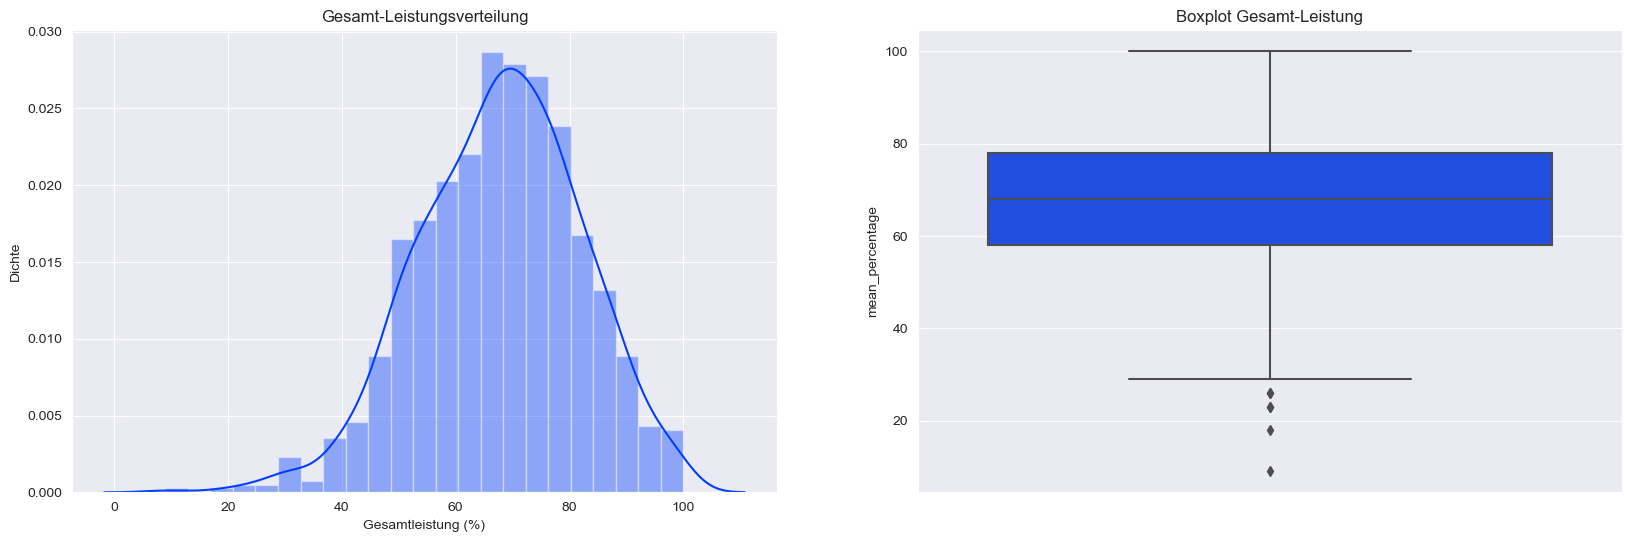

In [48]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Gesamt-Leistungsverteilung')
sns.distplot(df3.mean_percentage)
plt.xlabel('Gesamtleistung (%)')
plt.ylabel('Dichte')

plt.subplot(1,2,2)
plt.title('Boxplot Gesamt-Leistung')
sns.boxplot(y=df3.mean_percentage)

plt.show()

### c) Univariate Analyse: Darstellung der Daten in Kategorien

In [71]:
#Kreisdiagramm mit plotly express pie diagram
num=df3["gender"].value_counts().reset_index()
px.pie(num,names="gender",values="gender",title="Verteilung männliche / weibliche Schüler*innen",color_discrete_sequence=px.colors.sequential.RdBu)

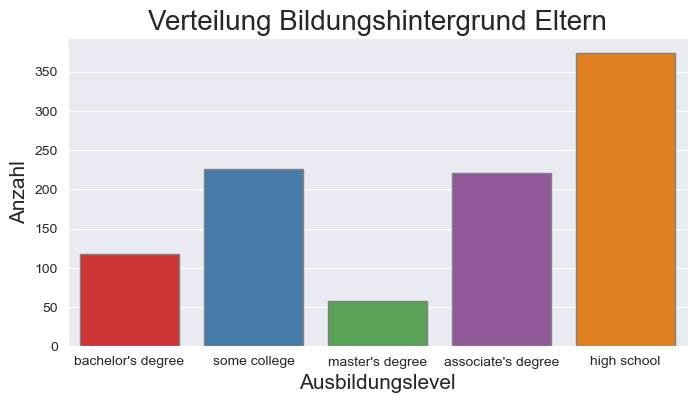

In [55]:
# Balkendiagramm mit seaborn countplot
plt.figure(figsize=(8,4))
sns.countplot(data = df3, x = 'parental level of education', palette = "Set1", edgecolor = "gray")
plt.title("Verteilung Bildungshintergrund Eltern",fontsize=20)
plt.xlabel("Ausbildungslevel",fontsize=15)
plt.ylabel("Anzahl",fontsize=15)
plt.show()

### d) Zusammenhänge zwischen zwei Variablen, bivariate Analyse

* Streudiagramme
* Korrelationskoeffizient R
* Visueller Vergleich zweier Gruppen

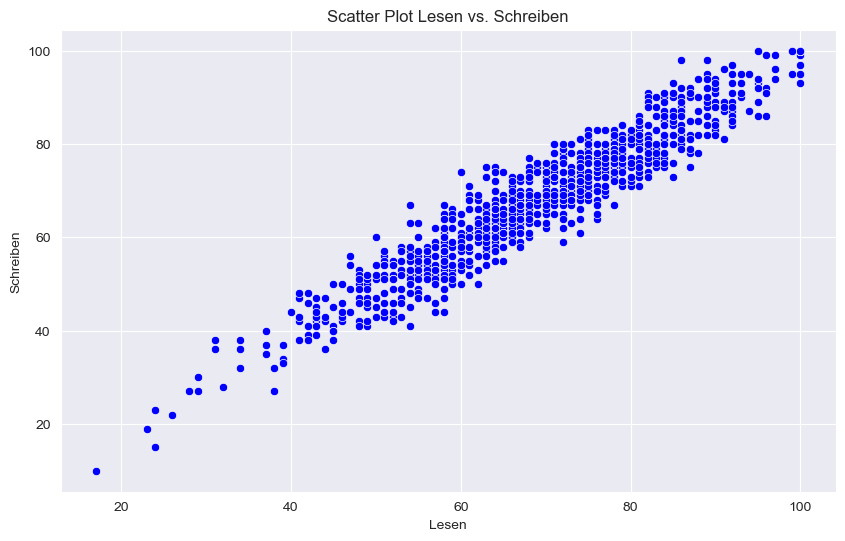

In [56]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df3, x=df3['reading score'], y=df3['writing score'], marker='o', color='blue')

plt.title('Scatter Plot Lesen vs. Schreiben')
plt.xlabel('Lesen')
plt.ylabel('Schreiben')

plt.show()

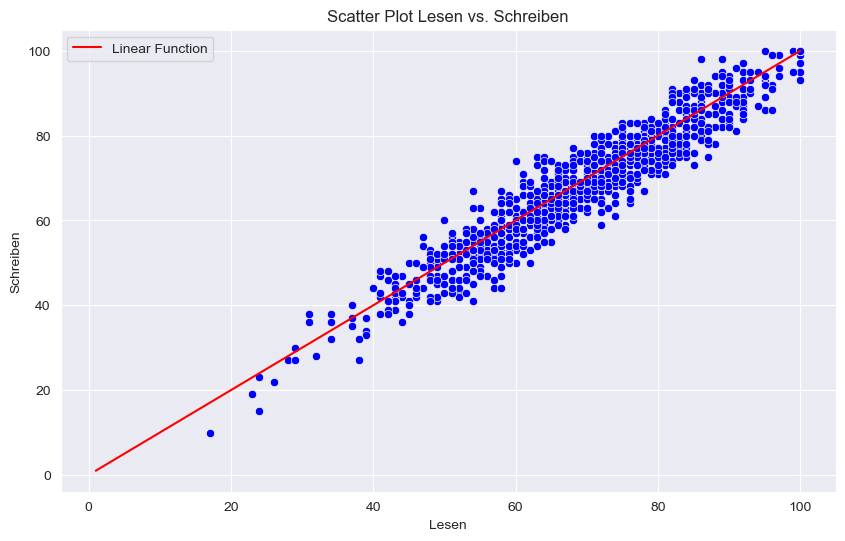

In [57]:
def linear_function(x):
    return 1* x

x_range = np.linspace(1, 100, 100)
y_function = linear_function(x_range)

plt.figure(figsize=(10, 6))

plt.title('Scatter Plot Lesen vs. Schreiben')
sns.scatterplot(data=df3, x=df3['reading score'], y=df3['writing score'], marker='o', color='blue')
plt.xlabel('Lesen')
plt.ylabel('Schreiben')

plt.plot(x_range, y_function, label='Linear Function', color='red')
plt.legend()

plt.show()

Korrelation

In [58]:
covariance =df3['reading score'].cov(df3['writing score'])
print("Covariance cov(x,y) =", covariance)

Covariance cov(x,y) = 211.77515276753954


In [59]:
correlation_coefficient = df3['reading score'].corr(df3['writing score'])

print("Correlation Coefficient R =", correlation_coefficient)

Correlation Coefficient R = 0.9545352083650306


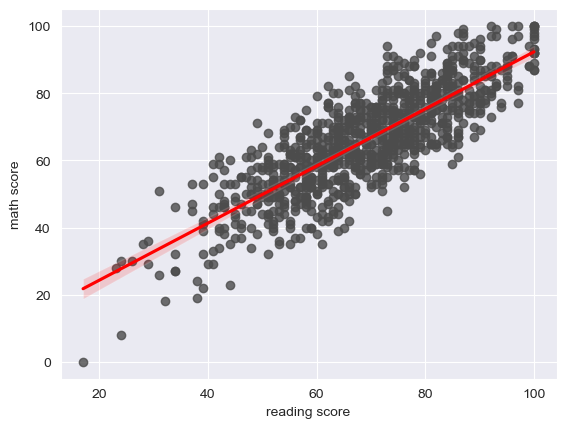

In [60]:
sns.regplot(
    data=df3, x=df3['reading score'], y=df3['math score'],
    ci=99, marker="o", color=".3", line_kws=dict(color="r"),
)
plt.show()

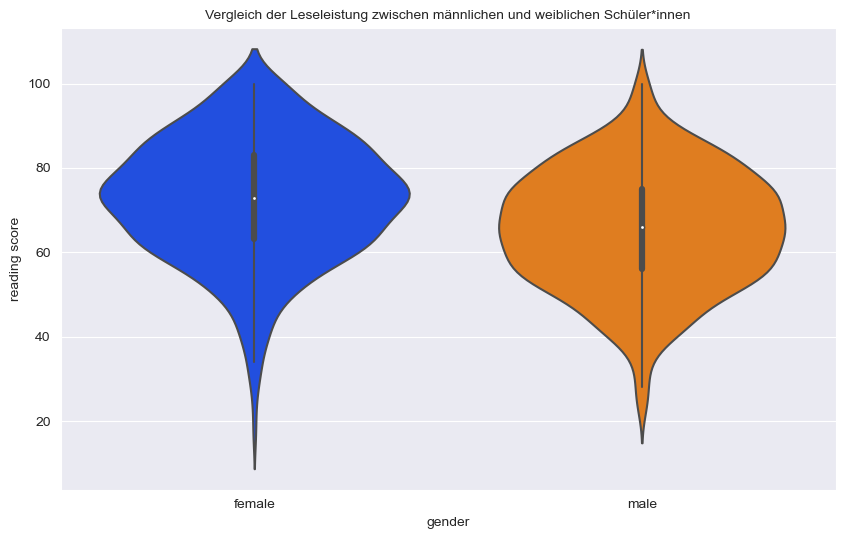

In [61]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["gender"],y=df["reading score"])
plt.title("Vergleich der Leseleistung zwischen männlichen und weiblichen Schüler*innen",fontsize=10)
plt.show()

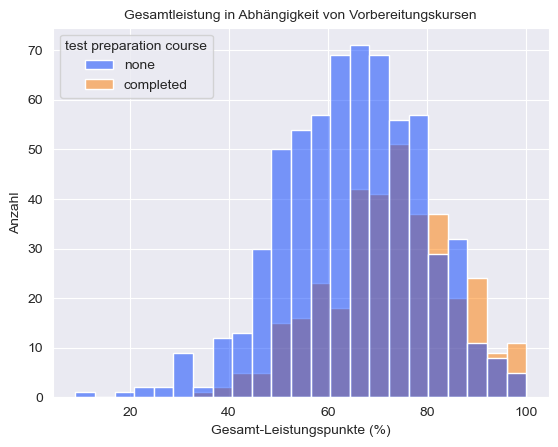

In [62]:
# Zwei Histogramme im Vergleich zeigen
sns.set_palette("bright")
sns.histplot(data=df3,x=df3.mean_percentage,hue="test preparation course")
plt.title("Gesamtleistung in Abhängigkeit von Vorbereitungskursen",fontsize=10)
plt.xlabel('Gesamt-Leistungspunkte (%)')
plt.ylabel('Anzahl')
plt.show()

### e) Multivariate Analyse

mehrdimensionale Abhängigkeiten untersuchen:

* Visueller Vergleich Abhängigkeiten
* Korrelationsmatrix
* ...
* ...

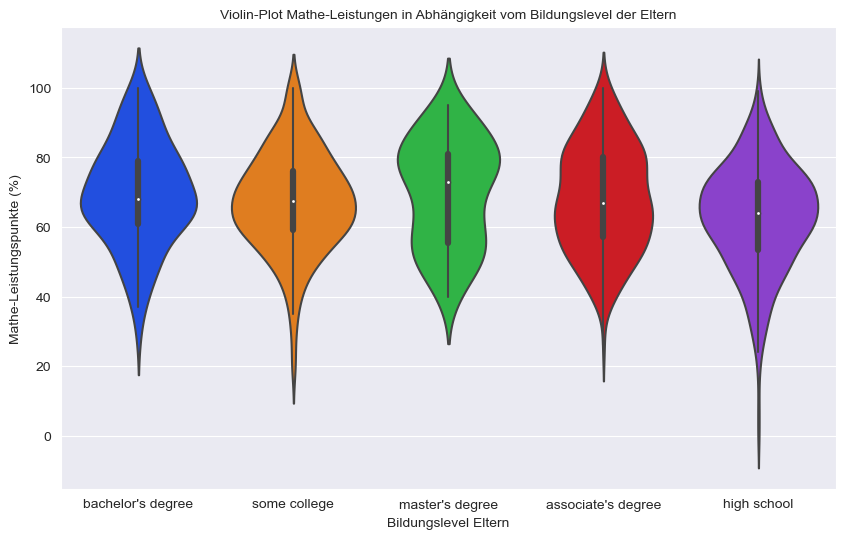

In [63]:
# Mehrere Gruppen in einer Grafik - Bsp. Violin-Plot
plt.figure(figsize=(10,6))
sns.violinplot(x=df3["parental level of education"],y=df3["math score"])
plt.title("Violin-Plot Mathe-Leistungen in Abhängigkeit vom Bildungslevel der Eltern",fontsize=10)
plt.xlabel('Bildungslevel Eltern')
plt.ylabel('Mathe-Leistungspunkte (%)')
plt.show()

In [64]:
# Boxplot-Variante mit plotly express
fig = px.box(df3, x='parental level of education', y='math score',labels=dict(
            Total="Passenger Class", Day_Avg="Age"))
fig.update_layout(title_text='Boxplot Mathe-Leistungen in Abhängigkeit vom Bildungslevel der Eltern',title_x=0.5)
fig.show()

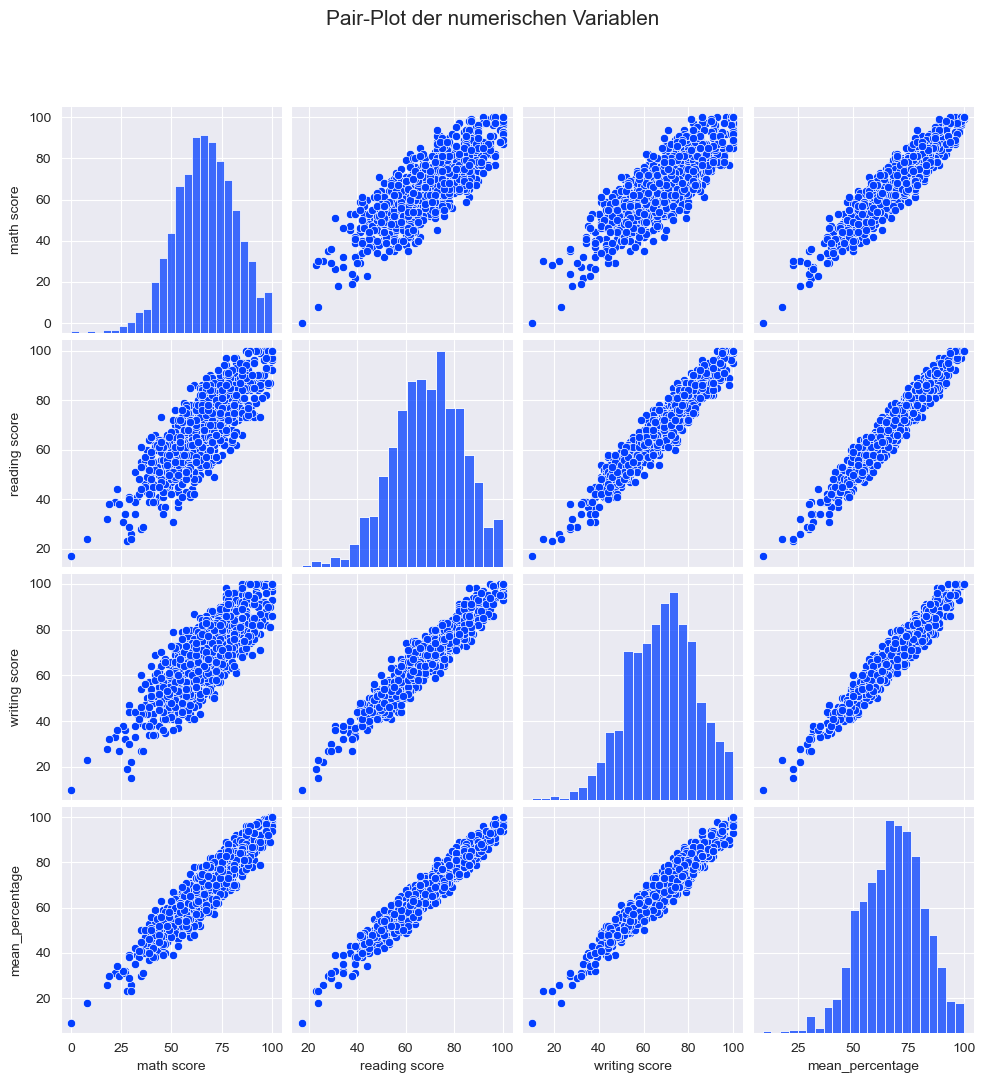

In [65]:
# Übersicht der Abhängigkeiten untereinander: grafisch als Pair-Plot (Streudiagramme)
g = sns.pairplot(df3)
g.fig.suptitle("Pair-Plot der numerischen Variablen",fontsize=15, y=1.08)
plt.show()

ValueError: could not convert string to float: 'female'

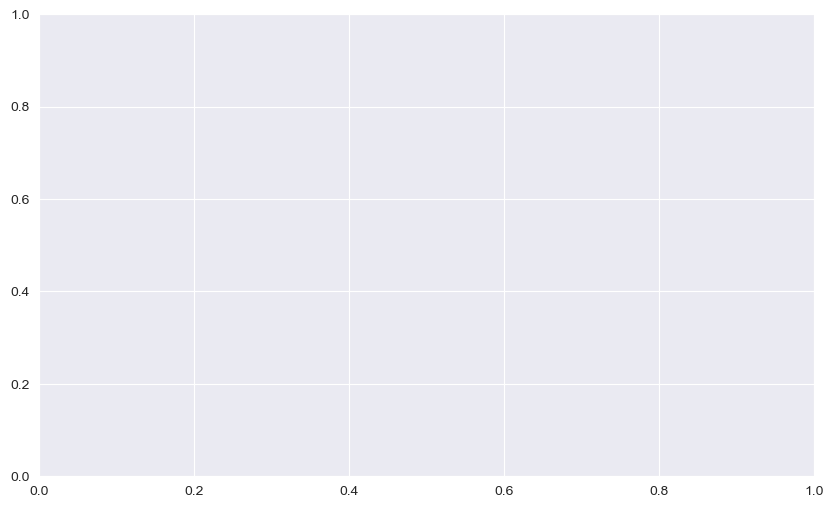

In [66]:
# mit Korrelationskoeffizienten als Heatmap
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df3.corr(),annot=True,ax=ax)
plt.title("Heatmap Korrelationen zwischen den numerischen Variablen",fontsize=12)
plt.show()

----------
.

# Zusammenfassung zu EDA-Analyse



1.   Numerische Variablen sind normal-verteilt.
2.   Numerische Variablen sind untereinander linear abhängig Korrelationskoeffizienten > 0.8.
3.   Es existiert eine deutliche Abhängigkeit der Leistungen der Schüler*innen vom Bildungslevel der Eltern.
4.   Schüler*innen, die einen Test-Vorbereitungskurs besucht haben, schneiden in ihren Leistungen besser ab.
5.   Schülerinnen sind leistungsstärker als Schüler.
6.   Wer gute Leistungen in Lesen und Schreiben hat, zeigt auch häufig in Mathe gute Leistungen.
-----------------

**Beschreibt den Datensatz (Achtung: unsere Analyse ist nicht vollständig!) und kann zur Bewertung des Zustandes in der Vergangenheit bzw. der aktuellen Situation verwendet werden (hindcast, nowcast).**

**Deskriptive und diagnostische Analyse!**



-----------------
.
# Zusätzliche Statistik

* Z-Score und Normalverteilung
* Signifikanz
* Ausreißer

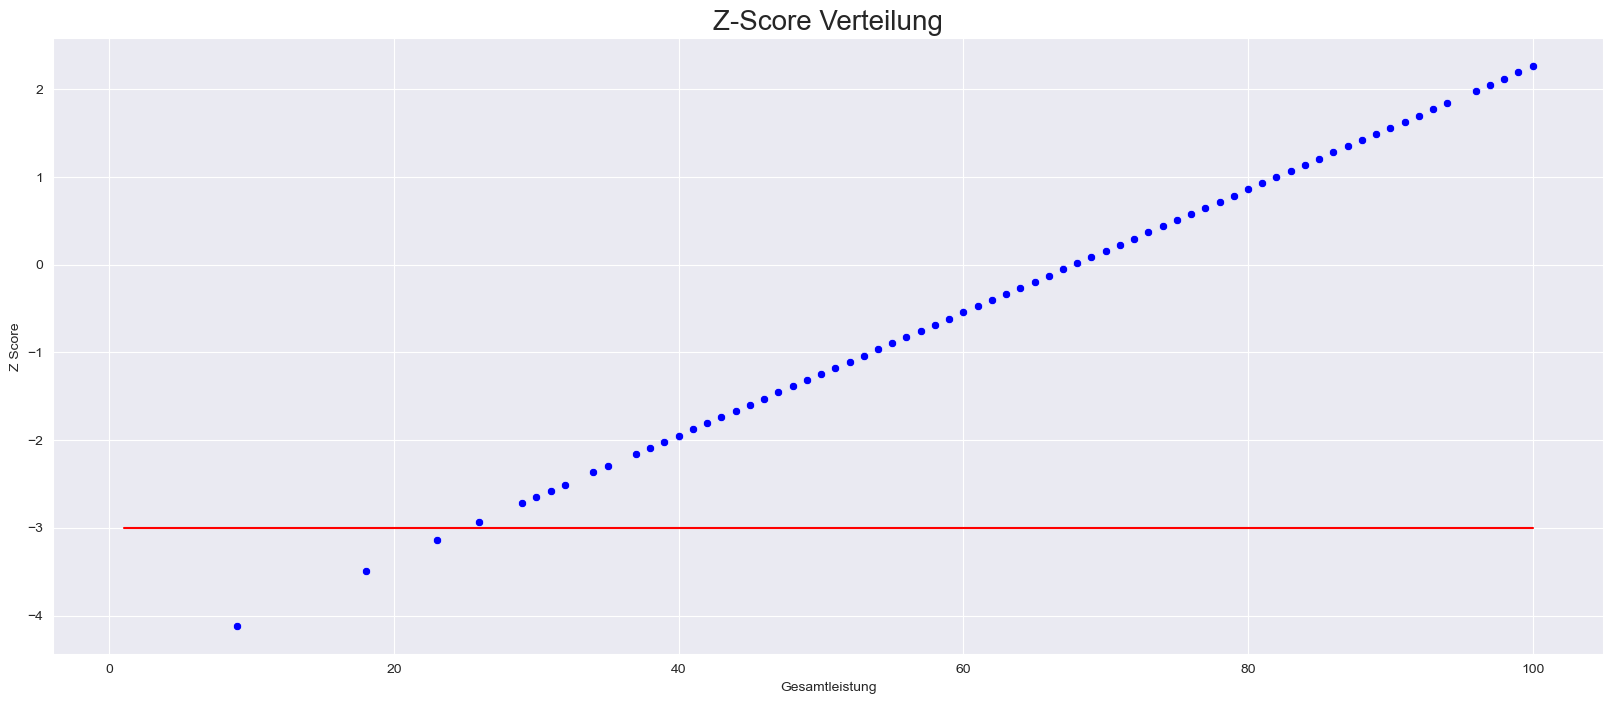

In [67]:
z= stats.zscore(df3.mean_percentage)

x_range = np.linspace(1, 100, 100)
y_function = -3 + 0*(x_range)

plt.figure(figsize=(20,8))

sns.scatterplot(data=df3, x=df3.mean_percentage, y=z, marker='o', color='blue')
plt.title('Z-Score Verteilung', fontsize=20)
plt.ylabel('Z Score')
plt.xlabel('Gesamtleistung')
plt.plot(x_range, y_function, label='Threshold', color='red')
plt.show()

In [68]:
from scipy.stats import ttest_1samp
t_stat, p_val = ttest_1samp(df3.mean_percentage, popmean=60)
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 17.203504784265174
p-value: 2.8331849952009818e-58


In [69]:
# Ausreißer herausfiltern - Quartile / 1.5 IQR nutzen

q1=df3.mean_percentage.quantile(0.25)
q3=df3.mean_percentage.quantile(0.75)
IQR=q3-q1
#outliers = df3.mean_percentage[((df3.mean_percentage<(q1-1.5*IQR)) | (df3.mean_percentage>(q3+1.5*IQR)))]
not_outliers = df3[~((df3.mean_percentage<(q1-1.5*IQR)) | (df3.mean_percentage>(q3+1.5*IQR)))]
df3_outliers_dropped = not_outliers.dropna().reset_index()
df3_outliers_dropped

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_percentage
0,0,female,group B,bachelor's degree,standard,none,72.0,72,74.0,73.0
1,1,female,group C,some college,standard,completed,69.0,90,88.0,82.0
2,2,female,group B,master's degree,standard,none,90.0,95,93.0,93.0
3,3,male,group A,associate's degree,free/reduced,none,47.0,57,44.0,49.0
4,4,male,group C,some college,standard,none,76.0,78,75.0,76.0
...,...,...,...,...,...,...,...,...,...,...
986,996,female,group E,master's degree,standard,completed,88.0,99,95.0,94.0
987,997,male,group C,high school,free/reduced,none,62.0,55,55.0,57.0
988,998,female,group C,high school,free/reduced,completed,59.0,71,65.0,65.0
989,999,female,group D,some college,standard,completed,68.0,78,77.0,74.0


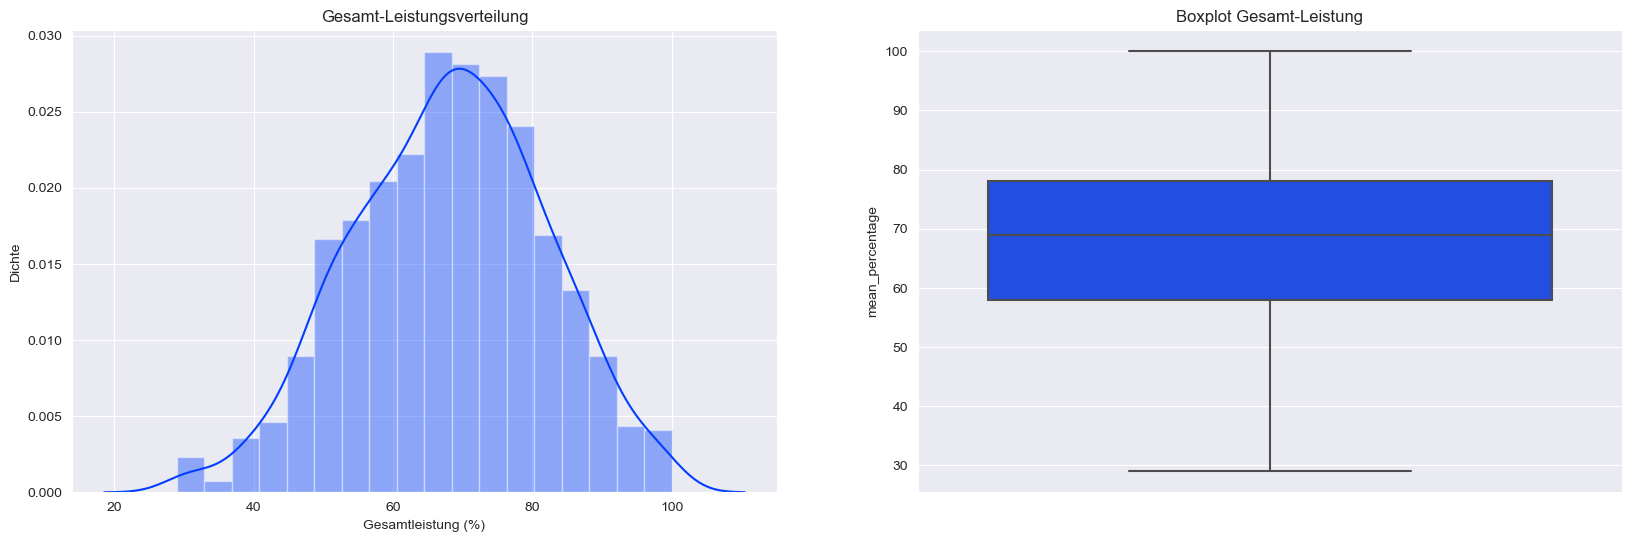

In [70]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Gesamt-Leistungsverteilung')
sns.distplot(df3_outliers_dropped.mean_percentage)
plt.xlabel('Gesamtleistung (%)')
plt.ylabel('Dichte')

plt.subplot(1,2,2)
plt.title('Boxplot Gesamt-Leistung')
sns.boxplot(y=df3_outliers_dropped.mean_percentage)

plt.show()